## Evaluating and visualizing gene ontology (GO) terms associated bacterial peptides in Trocas 7 incubations

## All stations

#### Beginning with: stripped bacterial peptides and GO term abundances in spreadsheets

#### Goal: heatmaps of GO terms over stations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import reduce

## Plotting bacterial GO terms using Seaborn heatmap

### For each incubation station
### Just cellular component GO terms

In [9]:
# rearranged and condensed the csv manually in Libre Calc
# read in new csv:

MN = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/unipept/GO/plotting/MN_CC_GO_sorted.csv", index_col=0)
MS = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/unipept/GO/plotting/MS_CC_GO_sorted.csv", index_col=0)
BY = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/unipept/GO/plotting/BY_CC_GO_sorted.csv", index_col=0)
CV = pd.read_csv("/home/millieginty/Documents/git-repos/amazon/analyses/T7-incubations/unipept/GO/plotting/CV_CC_GO_sorted.csv", index_col=0)

del MN['Unnamed: 3']
del MS['Unnamed: 3']
del BY['Unnamed: 3']
del CV['Unnamed: 3']

MN_T = MN.transpose()
MS_T = MS.transpose()
BY_T = BY.transpose()
CV_T = CV.transpose()

MN_T.head()

GO Cellular Component,integral component of membrane,cytoplasm,plasma membrane,nucleus,ribosome,mitochondrion
Time 0 small,44.202899,29.710145,16.666667,7.971014,0.724638,0.724638
T0 large,44.516129,23.225806,21.935484,8.387097,1.935484,0.000000
T24 small,43.648208,24.429967,18.892508,9.446254,2.605863,0.977199
Time 24 large,47.027027,21.621622,18.918919,9.729730,1.621622,1.081081


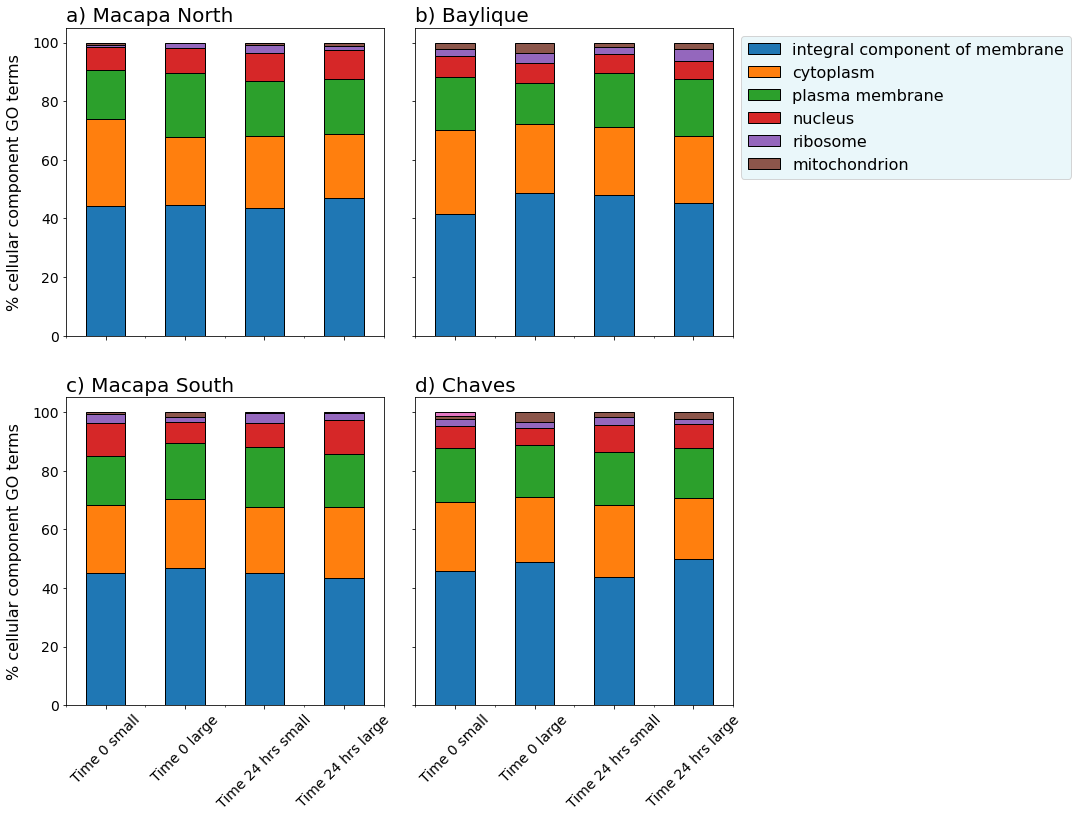

In [17]:
fig, axes = plt.subplots(figsize=(10, 10),nrows=2, ncols=2, sharex = True, sharey = True)

plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.2)

labels = ['Time 0 small', 'Time 0 large', 'Time 24 hrs small', 'Time 24 hrs large']

sns.color_palette("hls", 8)

#  Macapa North
MN_T.plot(ax = axes[0,0], kind='bar', stacked=True, edgecolor = 'black')
axes[0,0].set_title('a) Macapa North', fontsize = 20, loc='left')
axes[0,0].set_ylabel("% cellular component GO terms", labelpad=10, fontsize = 16)
axes[0,0].set_xticklabels(labels, rotation = 45)
axes[0,0].get_legend().remove()
axes[0,0].tick_params(axis='y', labelsize= 14)


#  Baylique
BY_T.plot(ax = axes[0,1], kind='bar', stacked=True, edgecolor = 'black')
axes[0,1].set_title('b) Baylique', fontsize = 20, loc='left')
axes[0,1].get_legend().remove()
axes[0,1].tick_params(axis='y', labelsize= 14)
#axes[0,1].legend(bbox_to_anchor=(1,1), loc="upper left", fontsize = 14, ncol = 2)

#  Macapa South
MS_T.plot(ax = axes[1,0], kind='bar', stacked=True, edgecolor = 'black')
axes[1,0].set_title('c) Macapa South', fontsize = 20, loc='left')
axes[1,0].set_ylabel("% cellular component GO terms", labelpad=10, fontsize = 16)
axes[1,0].get_legend().remove()
axes[1,0].set_xticklabels(labels, rotation = 45, fontsize = 14)
axes[1,0].tick_params(axis='y', labelsize= 14)

#  Chaves
CV_T.plot(ax = axes[1,1], kind='bar', stacked=True, edgecolor = 'black')
axes[1,1].set_title('d) Chaves', fontsize = 20, loc='left')
axes[1,1].get_legend().remove()
axes[1,1].set_xticklabels(labels, rotation = 45, fontsize = 14)
axes[1,1].tick_params(axis='y', labelsize= 14)

#handles, labels = axes[0,1].get_legend_handles_labels()
#axes[0,1].legend(handles[::-1], labels[::-1], bbox_to_anchor=(1,1), loc="upper left", fontsize = 12, ncol = 2)

handles, labels = axes[0,1].get_legend_handles_labels()
axes[0,1].legend(handles[::1], labels[::1], bbox_to_anchor=(1,1), \
                 loc="upper left", fontsize = 16, ncol = 1, facecolor = '#e5f5f9')